In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
train.head()
test= pd. read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
train.shape, test.shape

((13564, 17), (31647, 18))

In [8]:
print (train.columns)
print('\n')
print(test.columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [9]:
cat_col=[]
for i in train.dtypes.index:
    if train[i].dtypes=='object':
        cat_col.append(i)
print('Categorical Columns :', cat_col)
print('\n')
num_col=[]
for i in train.dtypes.index:
    if train[i].dtypes != 'object':
        num_col.append(i)
print('Numerical Columns :', num_col)

Categorical Columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


Numerical Columns : ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


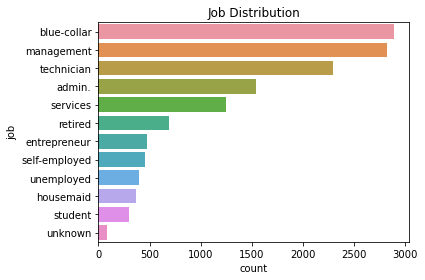

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, y='job', order = train['job'].value_counts().index)
plt.title('Job Distribution')
plt.tight_layout()
plt.show()

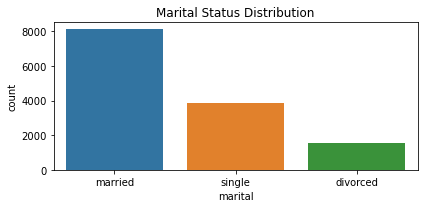

In [12]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train, x='marital', order = train['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.tight_layout()
plt.show()

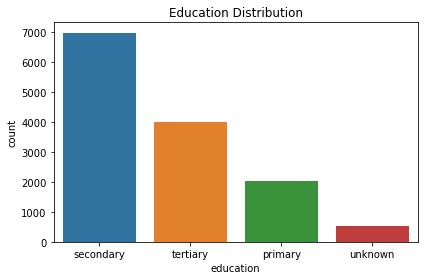

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='education', order = train['education'].value_counts().index)
plt.title('Education Distribution')
plt.tight_layout()
plt.show()

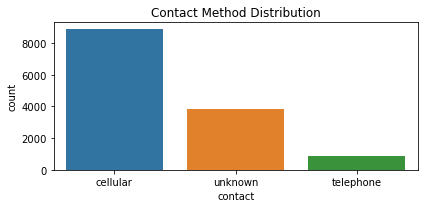

In [14]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train, x='contact', order = train['contact'].value_counts().index)
plt.title('Contact Method Distribution')
plt.tight_layout()
plt.show()

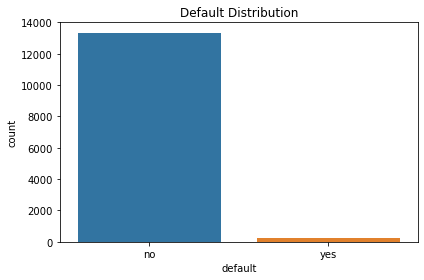

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='default', order = train['default'].value_counts().index)
plt.title('Default Distribution')
plt.tight_layout()
plt.show()

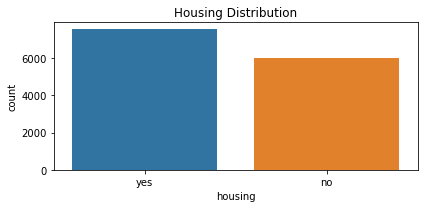

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(data=train, x='housing', order = train['housing'].value_counts().index)
plt.title('Housing Distribution')
plt.tight_layout()
plt.show()

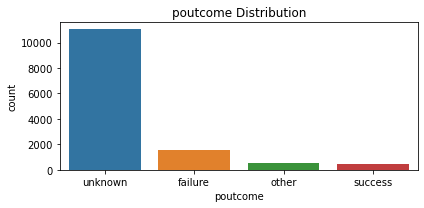

In [17]:
plt.figure(figsize=(6, 3))
sns.countplot(data=train, x='poutcome', order = train['poutcome'].value_counts().index)
plt.title('poutcome Distribution')
plt.tight_layout()
plt.show()

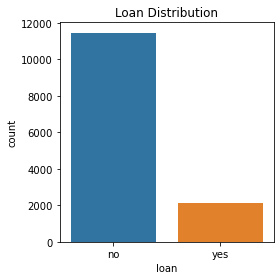

In [18]:
plt.figure(figsize=(4, 4))
sns.countplot(data=train, x='loan', order = train['loan'].value_counts().index)
plt.title('Loan Distribution')
plt.tight_layout()
plt.show()

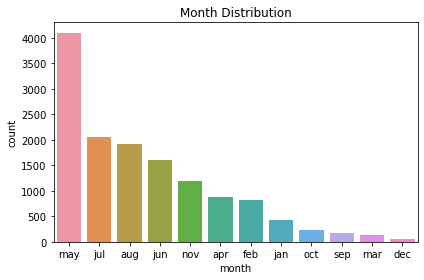

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='month', order = train['month'].value_counts().index)
plt.title('Month Distribution')
plt.tight_layout()
plt.show()

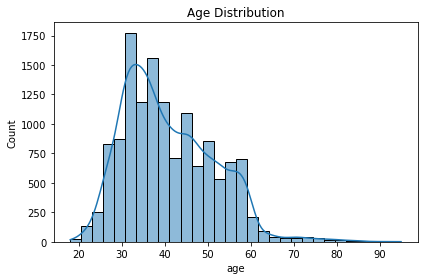

In [20]:
sns.histplot(train['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

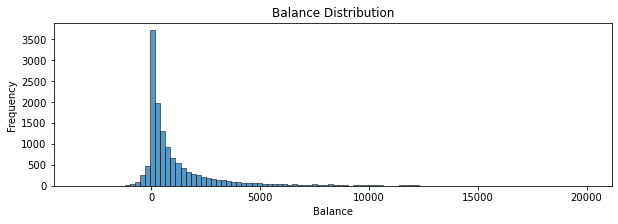

In [21]:
plt.figure(figsize=(10, 3))
sns.histplot(train[train['balance'] < 20000]['balance'], bins=100, kde=False)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

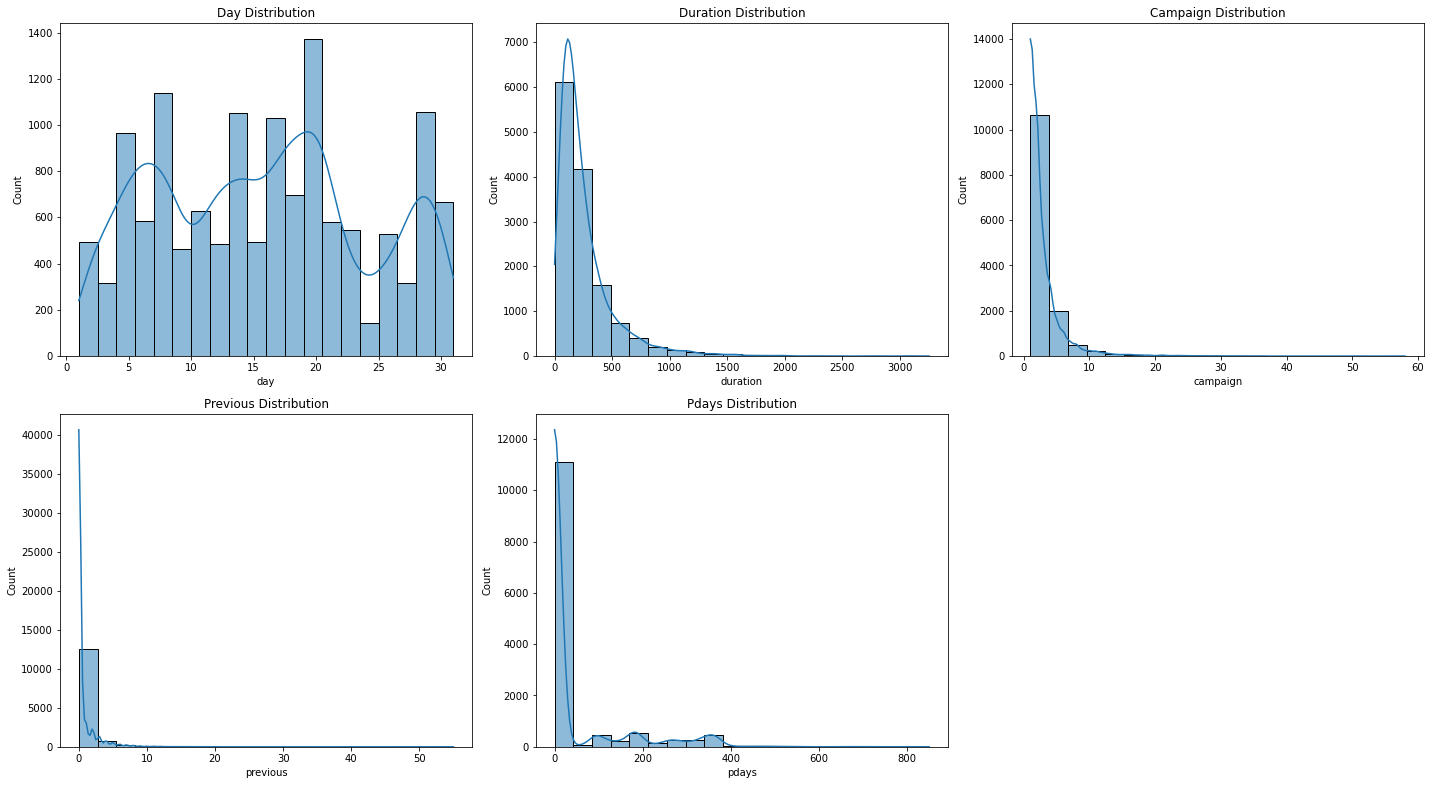

In [22]:
features = ['day', 'duration', 'campaign', 'previous', 'pdays']

plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(train[feature], bins=20, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()

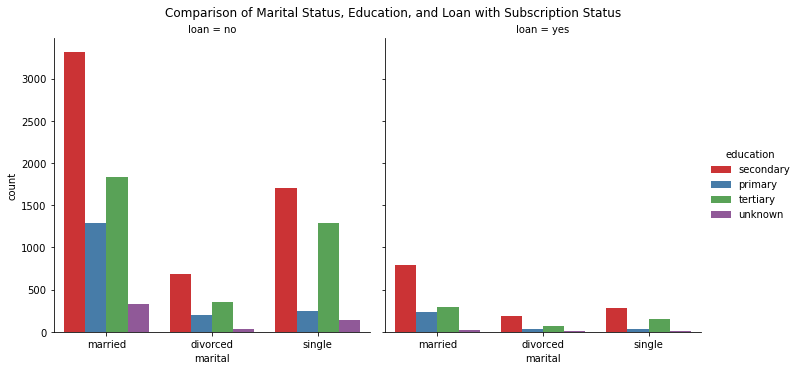

In [26]:
sns.catplot(x='marital', hue='education', col='loan', data=train, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Education, and Loan with Subscription Status', y=1.02)
plt.show()

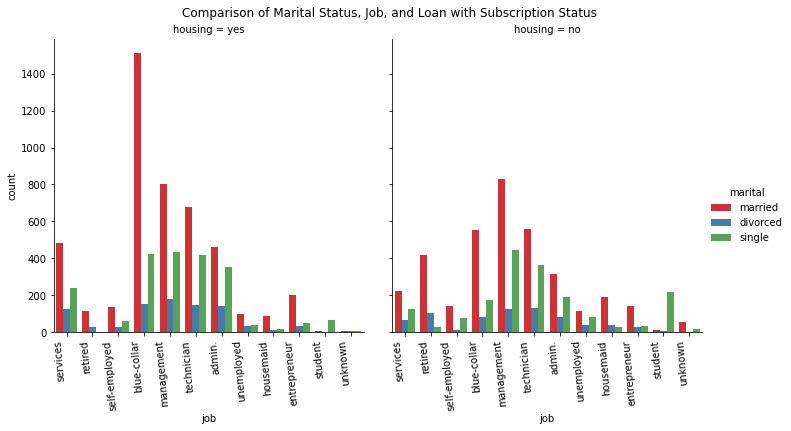

In [27]:
s=sns.catplot(x='job', hue='marital', col='housing', data=train, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Job, and Loan with Subscription Status', y=1.02)
s.set_xticklabels(rotation=95, ha='right')
plt.show()

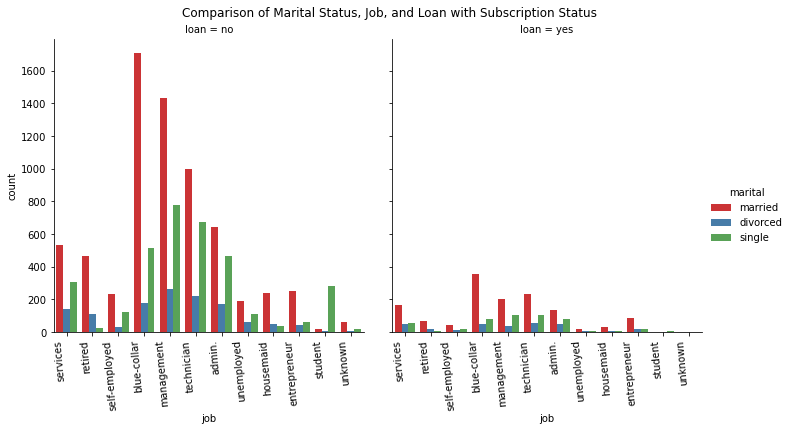

In [28]:
s=sns.catplot(x='job', hue='marital', col='loan', data=train, kind='count', palette='Set1', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Job, and Loan with Subscription Status', y=1.02)
s.set_xticklabels(rotation=95, ha='right')
plt.show()

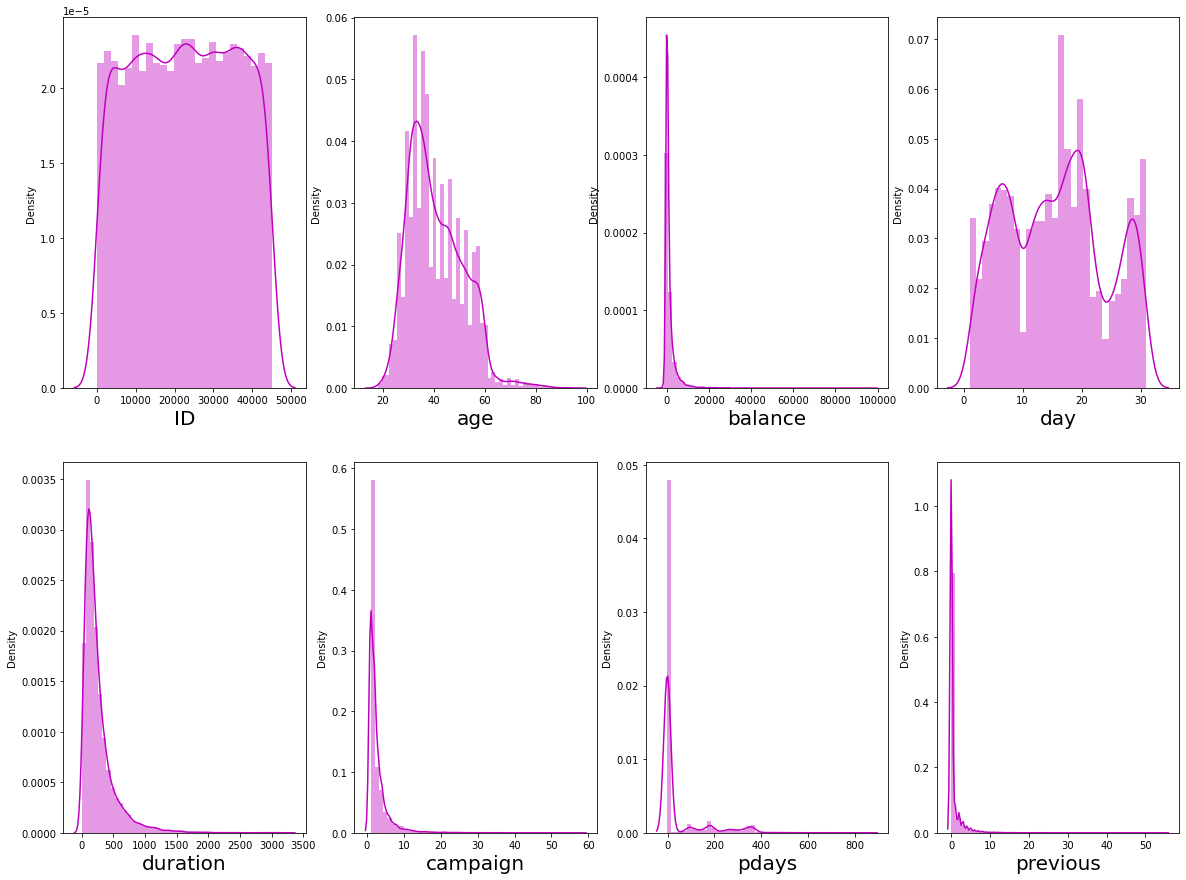

In [30]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(train[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

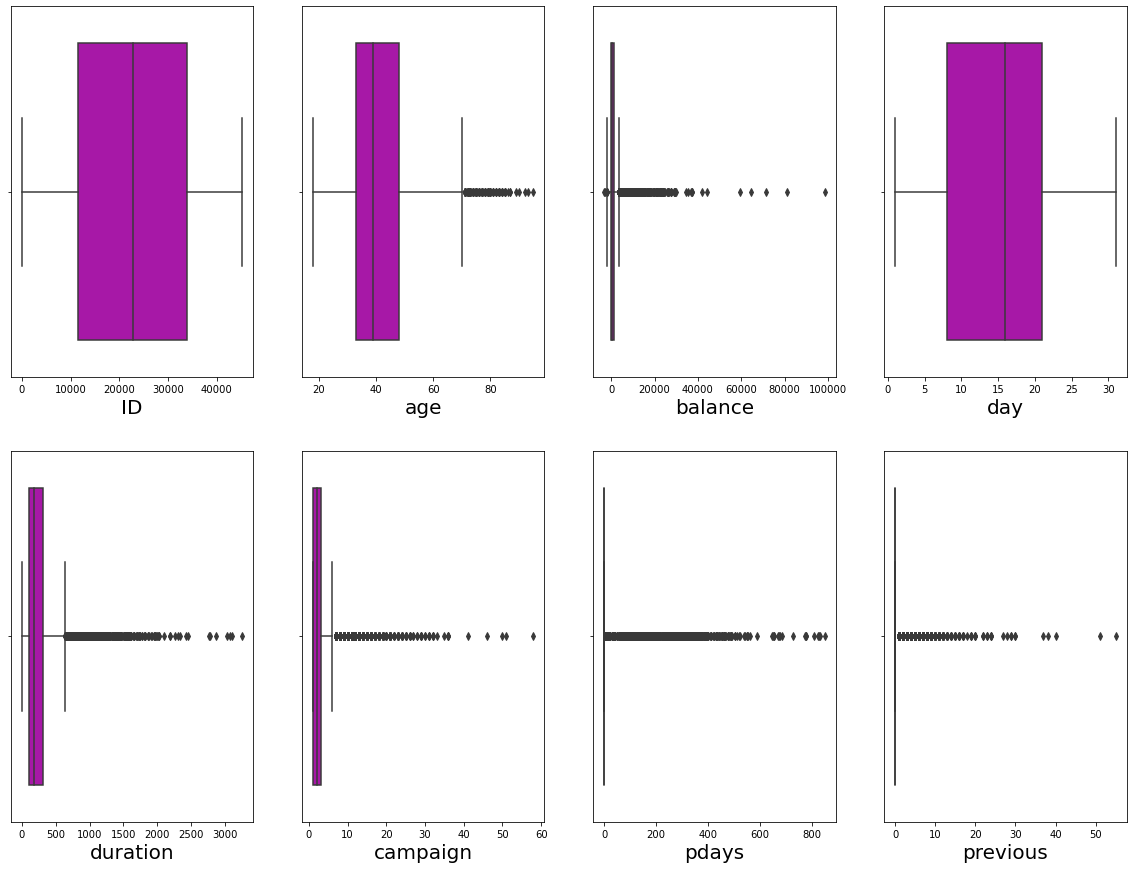

In [31]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for col in num_col:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(train[col],color = 'm')
        plt.xlabel(col, fontsize=20)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.show()

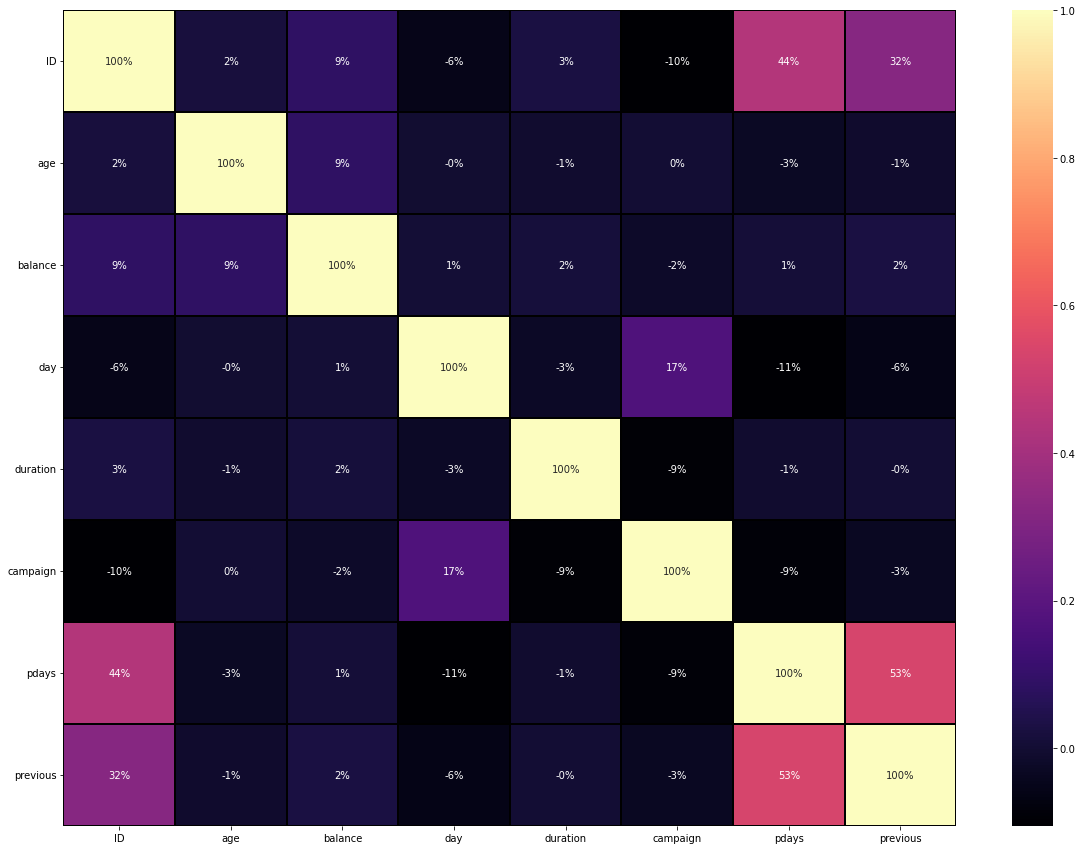

In [32]:
plt.figure(figsize = (20,15))
sns.heatmap(train.corr(), linewidths=0.1, fmt = '0.0%', linecolor ='black', annot = True, cmap = 'magma')
plt.yticks(rotation=0)
plt.show()